<a href="https://colab.research.google.com/github/dottorm/teaching_synthetic/blob/main/synthetic_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Installing the package to generate synthetic data

In [141]:
!pip install sdv

import required libraries

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer

download the dataset and populate pandas dataframe

In [143]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
column_names = [
        'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
        'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed',
        'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'
    ]
data_orig = pd.read_csv(url, names=column_names,na_values='?')

print(data_orig.head())
print('----------------------\n')
print('DataFrame INFO')
print(data_orig.info())
print('----------------------\n')
print('Count null values')
print(data_orig.isnull().sum())

  Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0           1.25            t        t            1              f       g   
1           3.04            t        t            6              f       g   
2           1.50            t        f            0              f       g   
3           3.75            t        t            5              t       g   
4           1.71            t        f            0              f       s   

   ZipCode  Income Approved  
0    202.0       0        +  
1     43.0     560        +  
2    280

Check categorical columns

Normalize 'Approved' column


In [144]:
categorical = [var for var in data_orig.columns if data_orig[var].dtype == 'O']
print(" There are {} categorical variables \n".format(len(categorical)))
print(" The Categorical variables are :",categorical)

 There are 10 categorical variables 

 The Categorical variables are : ['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen', 'Approved']


Check numerical columns

In [145]:
numerical = [var for var in data_orig.columns if data_orig[var].dtype != 'O']
print(" There are {} numerical variables \n".format(len(numerical)))
print(" The numerical variables are :",numerical)

 There are 6 numerical variables 

 The numerical variables are : ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']


In [146]:
#Remove null values
data = data_orig.dropna()

In [147]:
data['Approved'].value_counts()

Approved
-    357
+    296
Name: count, dtype: int64

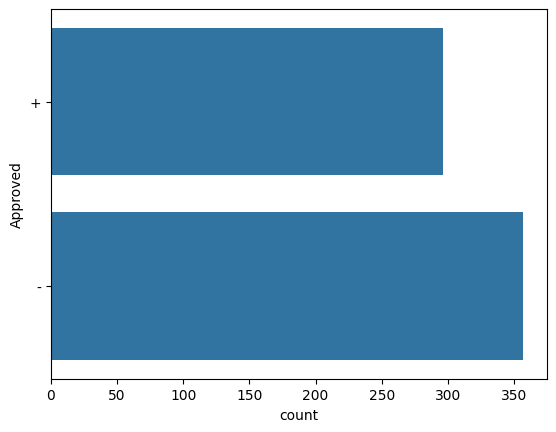

In [148]:
sns.countplot(data=data['Approved'])
plt.show()

<ipython-input-149-c4954e360549>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Income'])


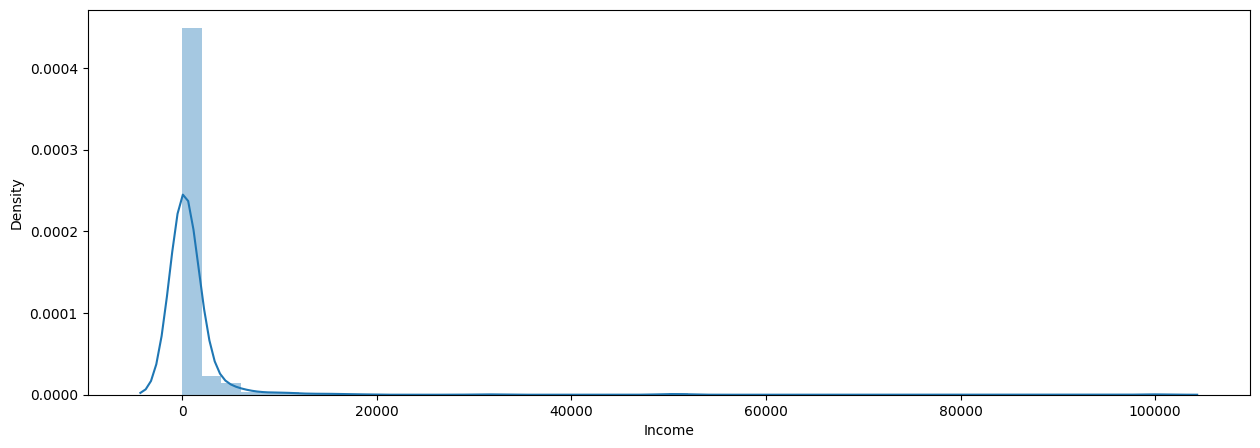

In [149]:
plt.subplots(figsize=(15,5))
sns.distplot(data['Income'])
plt.show()

<ipython-input-150-123bc41fe593>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Debt'],color='r')


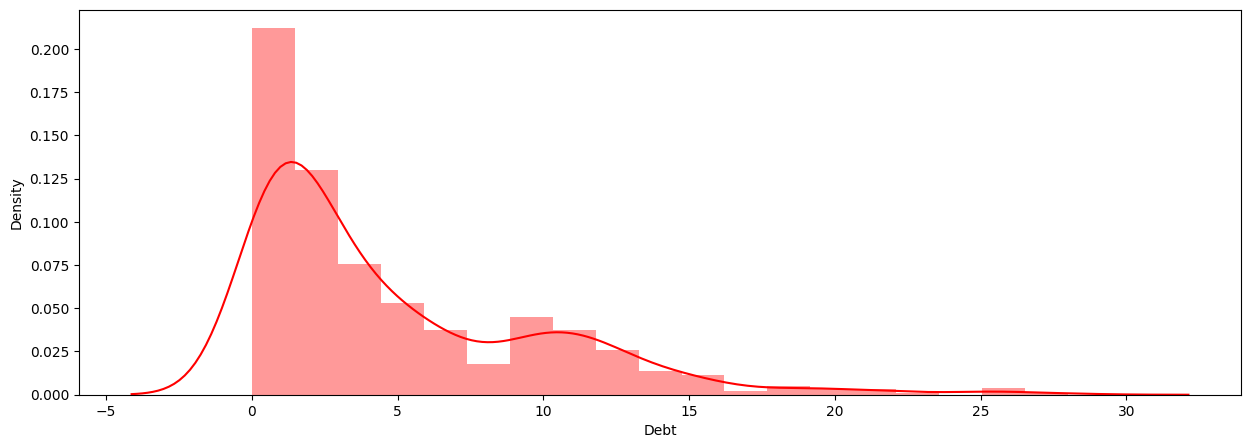

In [150]:
plt.subplots(figsize=(15,5))
sns.distplot(data['Debt'],color='r')
plt.show()

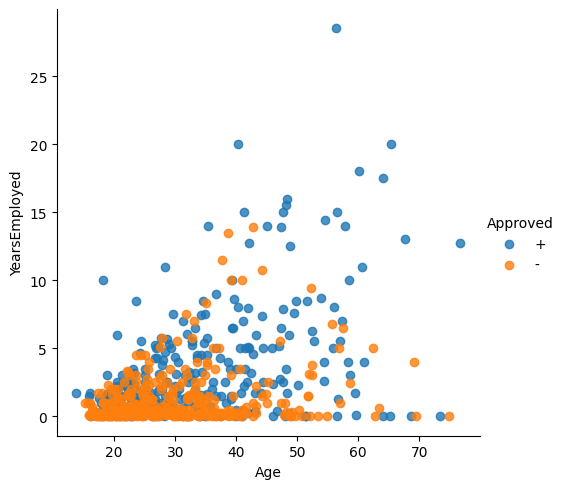

In [151]:
sns.lmplot(x="Age", y="YearsEmployed", data=data, hue="Approved", fit_reg=False)

<Axes: xlabel='Gender', ylabel='count'>

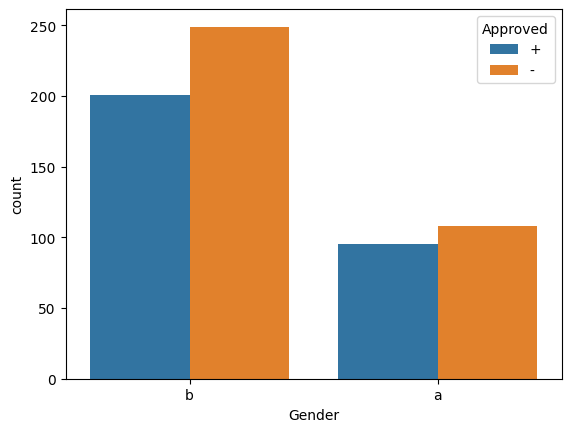

In [152]:
sns.countplot(x="Gender",hue="Approved",data=data)

In [153]:
print(data.groupby('Gender')['Approved'].count())

Gender
a    203
b    450
Name: Approved, dtype: int64


Correlation matrix

<Axes: >

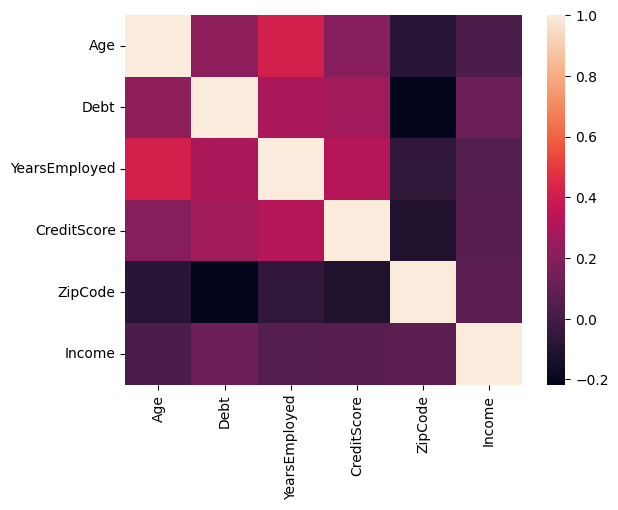

In [154]:
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix)

<Axes: xlabel='EducationLevel', ylabel='count'>

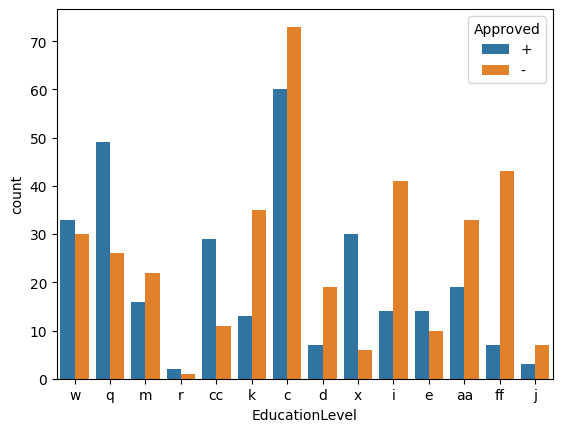

In [155]:
sns.countplot(x="EducationLevel",hue="Approved",data=data)

<Axes: xlabel='EducationLevel', ylabel='Income'>

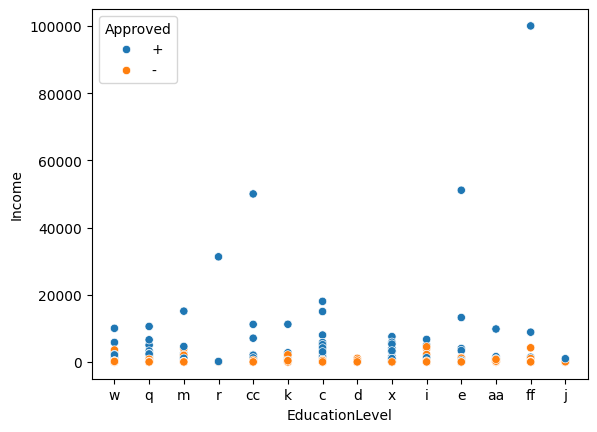

In [156]:

sns.scatterplot(data=data, x="EducationLevel", y="Income", hue="Approved")

<Axes: xlabel='Gender', ylabel='EducationLevel'>

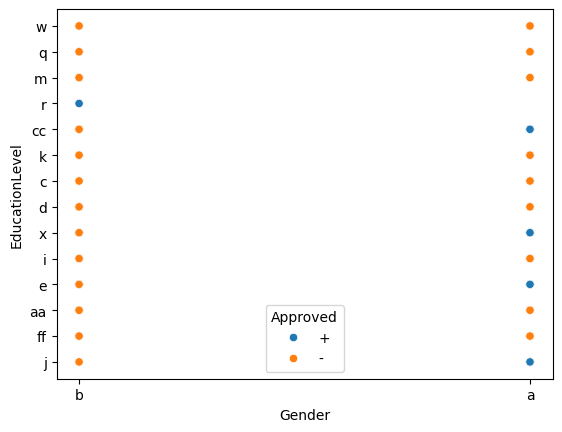

In [157]:
sns.scatterplot(data=data, x="Gender", y="EducationLevel", hue="Approved")

<Axes: xlabel='Ethnicity', ylabel='Income'>

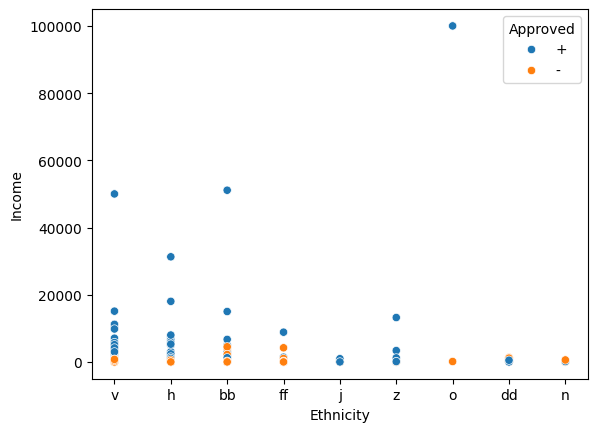

In [158]:
sns.scatterplot(data=data, x="Ethnicity", y="Income", hue="Approved")

<Axes: xlabel='Gender', ylabel='Ethnicity'>

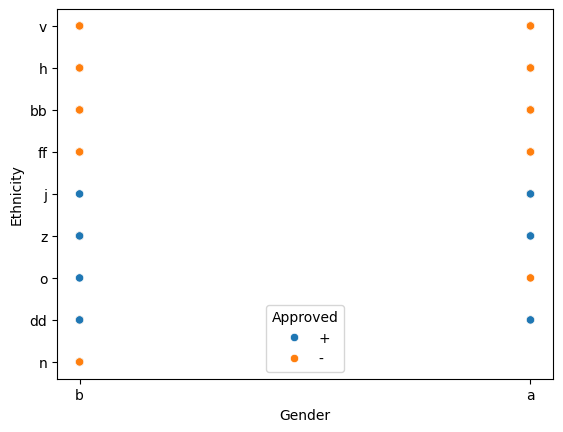

In [159]:
sns.scatterplot(data=data, x="Gender", y="Ethnicity", hue="Approved")

<Axes: xlabel='Ethnicity', ylabel='count'>

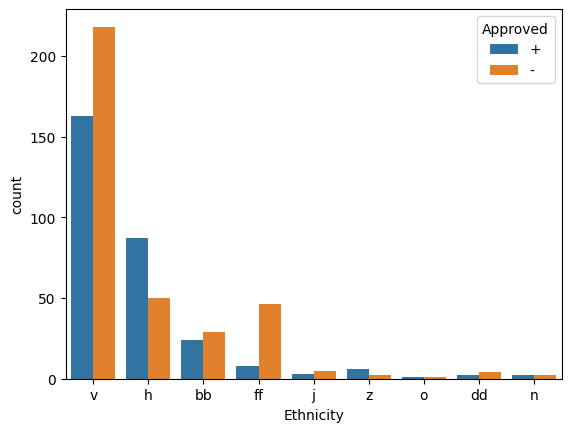

In [160]:
sns.countplot(data=data,x='Ethnicity',hue='Approved')

Synthetic data generation

In [161]:
from sdv.single_table import GaussianCopulaSynthesizer
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data_orig)

python_dict = metadata.to_dict()

print(metadata)

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data_orig)
synthetic_data = synthesizer.sample(num_rows=689)
print(synthetic_data.head())
print('----------------------\n')
print('DataFrame INFO')
print(synthetic_data.info())
print('----------------------\n')
print('Count null values')
print(synthetic_data.isnull().sum())

{
    "columns": {
        "Gender": {
            "sdtype": "categorical"
        },
        "Age": {
            "sdtype": "numerical"
        },
        "Debt": {
            "sdtype": "numerical"
        },
        "Married": {
            "sdtype": "categorical"
        },
        "BankCustomer": {
            "sdtype": "categorical"
        },
        "EducationLevel": {
            "sdtype": "categorical"
        },
        "Ethnicity": {
            "sdtype": "categorical"
        },
        "YearsEmployed": {
            "sdtype": "numerical"
        },
        "PriorDefault": {
            "sdtype": "categorical"
        },
        "Employed": {
            "sdtype": "categorical"
        },
        "CreditScore": {
            "sdtype": "numerical"
        },
        "DriversLicense": {
            "sdtype": "license_plate",
            "pii": true
        },
        "Citizen": {
            "sdtype": "categorical"
        },
        "ZipCode": {
            "sdtype": "postc

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:84: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


  Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  27.87  2.422       u            g              i         v   
1      b  27.05  5.966       u            g             aa         v   
2      a  25.14  0.319       y            p              x        bb   
3      b  23.36  1.298       u            g              q         v   
4      b  15.98  6.089       y            p              c        bb   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0          8.499            t        t            1        50GZ090       g   
1          3.615            f        f            0        K08 3IX       g   
2          2.619            t        t            0       MKS-3648       g   
3          6.914            f        f            0        NYG 221       g   
4          0.473            f        t            0       0K 94605       g   

   ZipCode  Income Approved  
0  49373.0     388        -  
1  99857.0       1        +  
2   7657

In [162]:
synthetic_data['Approved'].value_counts()

Approved
-    391
+    298
Name: count, dtype: int64

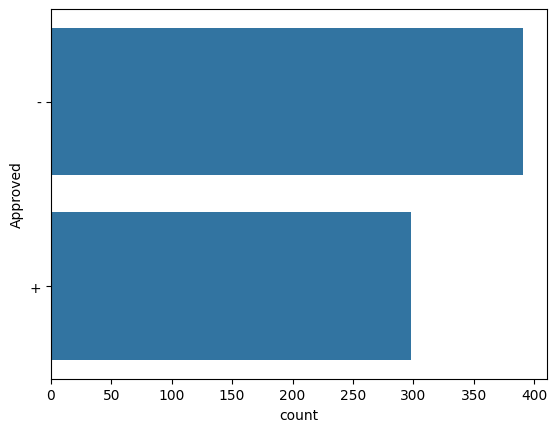

In [163]:
sns.countplot(data=synthetic_data['Approved'])
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

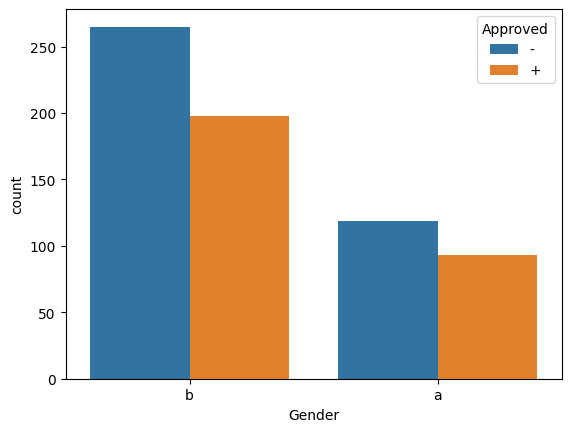

In [164]:
sns.countplot(x="Gender",hue="Approved",data=synthetic_data)

# Pre-Processing
Handling null values

In [165]:
print(data['Age'].value_counts())

Age
22.67    9
18.83    6
25.00    6
19.17    6
20.67    6
        ..
38.17    1
48.25    1
28.33    1
18.50    1
36.42    1
Name: count, Length: 340, dtype: int64


In [166]:

for col in data_orig:
    data_orig[col] = data_orig[col].fillna(data_orig[col].value_counts().index[0])

print('Count null values')
print(data_orig.isnull().sum())

Count null values
Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


Generate synthetic data after null handling

In [167]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    float64
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [168]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data_orig)

print(metadata)

python_dict = metadata.to_dict()


synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(data_orig)
synthetic_data = synthesizer.sample(num_rows=689)
print(synthetic_data.head())
print('----------------------\n')
print('Count null values')
print(synthetic_data.isnull().sum())

{
    "columns": {
        "Gender": {
            "sdtype": "categorical"
        },
        "Age": {
            "sdtype": "numerical"
        },
        "Debt": {
            "sdtype": "numerical"
        },
        "Married": {
            "sdtype": "categorical"
        },
        "BankCustomer": {
            "sdtype": "categorical"
        },
        "EducationLevel": {
            "sdtype": "categorical"
        },
        "Ethnicity": {
            "sdtype": "categorical"
        },
        "YearsEmployed": {
            "sdtype": "numerical"
        },
        "PriorDefault": {
            "sdtype": "categorical"
        },
        "Employed": {
            "sdtype": "categorical"
        },
        "CreditScore": {
            "sdtype": "numerical"
        },
        "DriversLicense": {
            "sdtype": "license_plate",
            "pii": true
        },
        "Citizen": {
            "sdtype": "categorical"
        },
        "ZipCode": {
            "sdtype": "postc

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:84: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


  Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  80.25  10.164       u            g             ff         h   
1      b  28.44  27.168       u            g              w         h   
2      a  35.53  12.105       y            g             ff         v   
3      b  26.94  17.108       y            g              c         v   
4      a  35.86   1.898       u            g              k         n   

   YearsEmployed PriorDefault Employed  CreditScore DriversLicense Citizen  \
0          0.328            t        t            0        50GZ090       g   
1          2.367            f        f            0        K08 3IX       g   
2          0.762            f        f            0       MKS-3648       g   
3          3.566            f        t            3        NYG 221       s   
4          1.035            t        f            0       0K 94605       g   

   ZipCode  Income Approved  
0  49373.0       0        -  
1  99857.0       0        +  
2 

In [173]:
from sdv.sampling import Condition


metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data_orig)


model = CTGANSynthesizer(metadata) # no constraints
model.fit(data_orig)

condition1 = Condition({'Gender': 'b', 'Approved': '+'}, num_rows=250)
condition2 = Condition({'Gender': 'a', 'Approved': '+'}, num_rows=250)
condition3 = Condition({'Gender': 'b', 'Approved': '-'}, num_rows=250)
condition4 = Condition({'Gender': 'a', 'Approved': '-'}, num_rows=250)

test = synthesizer.sample_from_conditions(conditions=[condition1, condition2,condition3,condition4])
test.head()

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:84: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Sampling conditions: 100%|██████████| 1000/1000 [00:01<00:00, 727.92it/s]


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,21.51,10.679,u,p,q,v,0.000,t,f,1,87-64140,g,82730.0,465,+
1,b,74.85,3.768,y,g,ff,h,3.031,t,f,1,92I OS2,g,80410.0,0,+
2,b,24.33,10.238,y,g,c,v,1.452,t,f,0,4R G3340,g,41109.0,0,+
3,b,80.25,15.628,y,p,e,ff,3.490,f,f,0,1JM61,g,32259.0,0,+
4,b,80.25,6.414,y,g,x,v,2.295,f,f,0,U22 2QG,g,73911.0,0,+


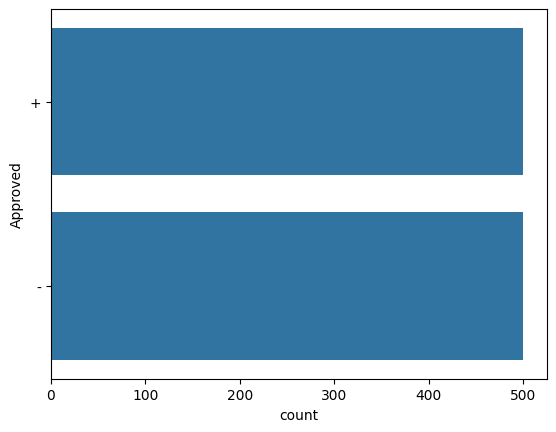

In [174]:
sns.countplot(data=test['Approved'])
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

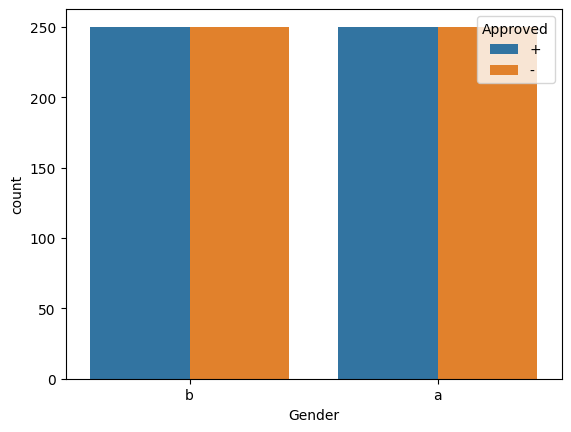

In [175]:
sns.countplot(x="Gender",hue="Approved",data=test)

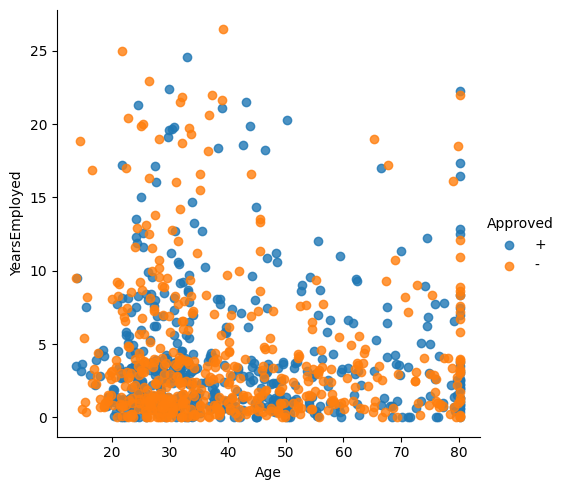

In [176]:
sns.lmplot(x="Age", y="YearsEmployed", data=test, hue="Approved", fit_reg=False)